<a href="https://colab.research.google.com/github/Navi433/Advance-house-price-prediction/blob/master/Multi_Label_Image_classification_on_Movie_Posters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

In [0]:
import pandas as pd

In [0]:
import numpy as np
from keras.preprocessing import  image


In [0]:
dataset=pd.read_csv('/content/Movies-Poster_Dataset/train.csv')

In [110]:
dataset.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [111]:
dataset.shape

(7254, 27)

In [112]:
dataset.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [113]:
dataset['Adventure'].nunique

<bound method IndexOpsMixin.nunique of 0       0
1       0
2       0
3       0
4       1
       ..
7249    0
7250    0
7251    0
7252    0
7253    0
Name: Adventure, Length: 7254, dtype: int64>

In [0]:
dataset.shape
import tqdm

In [0]:
X=[]

for i in range(dataset.shape[0]):
  path='/content/Movies-Poster_Dataset/Images/'+dataset['Id'][i] +'.jpg'
  img=image.load_img(path,target_size=(350,350,3))
  img=image.img_to_array(img)
  img=img/255.0
  X.append(img)
  


In [116]:
X=np.array(X)
X.shape

(7254, 350, 350, 3)

In [0]:
import matplotlib.pyplot as plt


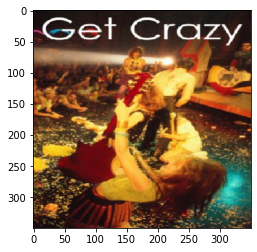

In [118]:
plt.imshow(X[100])

In [0]:
y=dataset.drop(columns=['Genre','Id'])

In [0]:
y=y.to_numpy()

In [122]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)   

In [0]:
import keras

In [0]:
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization

In [0]:
from keras.layers import Activation

In [0]:
from keras.models import Sequential

In [0]:
model=Sequential()

In [0]:
model.add((Conv2D(16,(3,3),activation='relu',input_shape=(350,350,3))))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))



In [0]:
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


Batch normalization is a technique for improving the speed, performance, and stability of artificial neural networks. Batch normalization was introduced in a 2015 paper. It is used to normalize the input layer by adjusting and scaling the activations.

In [0]:
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [0]:
model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [0]:
model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [0]:
model.add(Dense(units=25,activation='sigmoid'))


In [138]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_21 (Batc (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 174, 174, 16)      0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_22 (Batc (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 86, 86, 32)       

In [0]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [140]:
model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))



Train on 6165 samples, validate on 1089 samples
Epoch 1/5
6165/6165 [==============================] - 199s 32ms/step - loss: 0.7141 - acc: 0.6385 - val_loss: 1.2631 - val_acc: 0.7436
Epoch 2/5
6165/6165 [==============================] - 193s 31ms/step - loss: 0.3223 - acc: 0.8848 - val_loss: 0.2446 - val_acc: 0.9106
Epoch 3/5
6165/6165 [==============================] - 196s 32ms/step - loss: 0.2647 - acc: 0.9053 - val_loss: 0.2405 - val_acc: 0.9106
Epoch 4/5
6165/6165 [==============================] - 197s 32ms/step - loss: 0.2546 - acc: 0.9076 - val_loss: 0.2372 - val_acc: 0.9103
Epoch 5/5
6165/6165 [==============================] - 195s 32ms/step - loss: 0.2485 - acc: 0.9100 - val_loss: 0.2463 - val_acc: 0.9115


In [0]:
from keras.preprocessing import image

In [0]:
img=image.load_img('/content/download (1).jpg',target_size=(350,350,3))
img=image.img_to_array(img)
img=img.reshape(1,350,350,3)
img=img/255.0


In [180]:
img.shape

(1, 350, 350, 3)

In [0]:
classes=dataset.columns[2:]

In [182]:
classes

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [0]:
y_pred=model.predict(img)

In [184]:
y_pred

array([[0.21234143, 0.15417486, 0.01836109, 0.06404468, 0.24715468,
        0.14263728, 0.07092404, 0.55273926, 0.03581476, 0.07384735,
        0.02869543, 0.07681522, 0.02494392, 0.00691247, 0.0611378 ,
        0.00233909, 0.00196978, 0.00203836, 0.11275733, 0.07048234,
        0.00523058, 0.0144895 , 0.10789576, 0.01254609, 0.00466681]],
      dtype=float32)

In [185]:
top3 = np.argsort(y_pred[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Drama
Comedy
Action
